## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle #for serialisation
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)


In [0]:
import pandas as pd

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

There are about 60000 train sets and 10000 test sets

### Find dimensions of an image in the dataset

In [0]:
x_train[0:1].shape


(1, 28, 28)

The dimension of the image is 28 by 28

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
#finding number of classes

#here we know the classes are 10 so we can directly use as 10 in case its not mentioned we need to use value_counts to get the # of classes by converting y_train to dataframe
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
%matplotlib inline
# Load/Prep the Data

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#keras requires 28*28*1 so the reshaping is done

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers import Dense, Activation,Dropout, Flatten, Reshape

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
# Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer #put metrics as f1 score
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0096 - acc: 0.9964 - val_loss: 0.7690 - val_acc: 0.9114
Epoch 2/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0087 - acc: 0.9975 - val_loss: 0.7718 - val_acc: 0.9097
Epoch 3/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0084 - acc: 0.9972 - val_loss: 0.7524 - val_acc: 0.9114
Epoch 4/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0087 - acc: 0.9974 - val_loss: 0.7503 - val_acc: 0.9112
Epoch 5/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0071 - acc: 0.9977 - val_loss: 0.7271 - val_acc: 0.9106
Epoch 6/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0084 - acc: 0.9978 - val_loss: 0.7913 - val_acc: 0.9096
Epoch 00006: early stopping


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [106]:
# Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0767 - acc: 0.9712 - val_loss: 0.2742 - val_acc: 0.9230
Epoch 2/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0617 - acc: 0.9768 - val_loss: 0.2868 - val_acc: 0.9256
Epoch 3/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0561 - acc: 0.9785 - val_loss: 0.2978 - val_acc: 0.9242
Epoch 4/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0484 - acc: 0.9824 - val_loss: 0.3218 - val_acc: 0.9251
Epoch 5/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0441 - acc: 0.9837 - val_loss: 0.3345 - val_acc: 0.9222
Epoch 6/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0408 - acc: 0.9843 - val_loss: 0.3414 - val_acc: 0.9247
Epoch 7/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0371 - acc: 0.9866 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np


# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

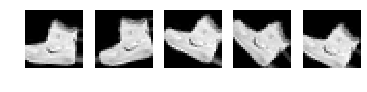

In [108]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [109]:

# initialize the number of epochs and batch size
EPOCHS=10
BS = 32
 
 
# train the network
H = model3.fit_generator(datagen.flow(x_train, y_train, batch_size=BS),
	validation_data=(x_test, y_test), steps_per_epoch=len(x_train)/32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5346 - acc: 0.8046 - val_loss: 0.2906 - val_acc: 0.8965
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.4578 - acc: 0.8307 - val_loss: 0.2949 - val_acc: 0.8944
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4308 - acc: 0.8415 - val_loss: 0.2991 - val_acc: 0.8966
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4157 - acc: 0.8448 - val_loss: 0.2834 - val_acc: 0.9008
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4035 - acc: 0.8518 - val_loss: 0.2994 - val_acc: 0.8953
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3954 - acc: 0.8532 - val_loss: 0.2815 - val_acc: 0.9045
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3839 - acc: 0.8577 - val_loss: 0.3070 - val_acc: 0.8959
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [110]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 94us/step
[0.2950374210000038, 0.897]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10


### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import np_utils
import numpy as np


# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images




### **Prepare/fit the generator.**

In [0]:
 # Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


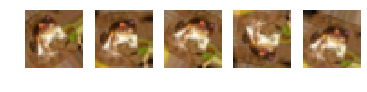

In [115]:
from matplotlib import pyplot as plt
from scipy.misc import toimage
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(toimage(gen.next().squeeze()), cmap='gray')
    plt.plot()
plt.show()